In [143]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi as pi
statsmodels.tsa
from statsmodels.tsa import holtwinters
%matplotlib inline

# Functions

In [271]:
def smape(a, b):
    """
    Calculates sMAPE
    :param a: actual values
    :param b: predicted values
    :return: sMAPE
    """
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b)))


## Data Simulation

In [272]:
N = 1000
len_x = 40
x = np.linspace(0, len_x, N)
ts = len_x / float(N)
f=1
samples_per_period = int(1. /f / ts)

print samples_per_period
f = 1;

y = 2 * x + (1.065 ** x) * np.sin(2*pi*f*x)

noise = np.random.rand(N)

y += 3 * noise

25


In [107]:
x_date = pd.date_range(start='8/1/15', periods=1000, freq='D')
data_dict = {'time': x_date, 'data': y}
df_xy = pd.DataFrame.from_dict(data_dict).set_index('time', drop=True)


In [108]:
df_xy.head(10)

,data
time,
2015-08-01,1.489296
2015-08-02,1.606595
2015-08-03,3.389732
2015-08-04,1.539604
2015-08-05,3.309471
2015-08-06,3.256374
2015-08-07,2.074141
2015-08-08,4.512841
2015-08-09,3.741148


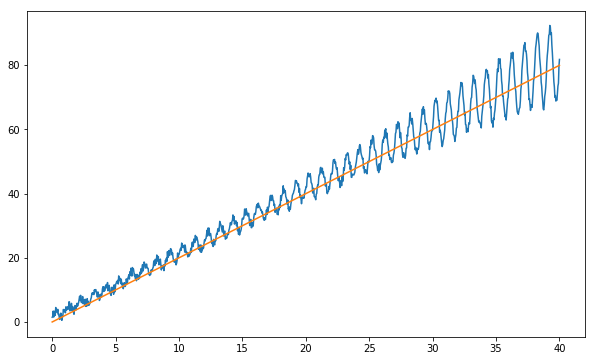

In [39]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(x, y);
plt.plot(x, 2 * x);
# plt.xlim(0,1)

# Naive method

In [162]:
naive_bayes = 2
y_naive = y[:-naive_bayes]
y_naive_2=y[:-int(samples_per_period)]

(25, 70)

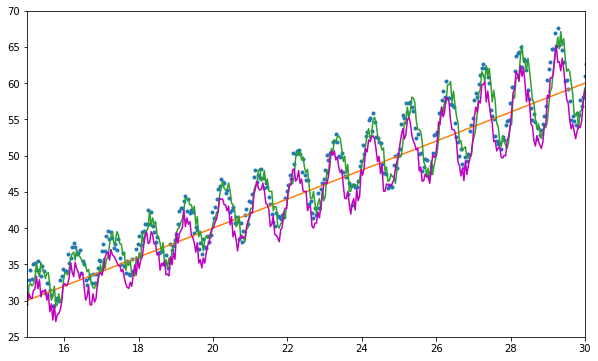

In [276]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(x, y, '.',linewidth=3);
plt.plot(x, 2 * x);
plt.plot(x[naive_bayes:], y_naive)
plt.plot(x[samples_per_period:], y_naive_2, color='m')
# plt.xlim(0, 20)
# plt.ylim(0, 40)
plt.xlim(15, 30)
plt.ylim(25, 70)

In [228]:
a, b = [1, 1, 1, 10], [1, 1, 1, 11]

In [229]:
smape(y[naive_bayes:], y_naive)

0.06611455321576896

In [230]:
smape(y[samples_per_period:], y_naive_2)

0.09262965491827936

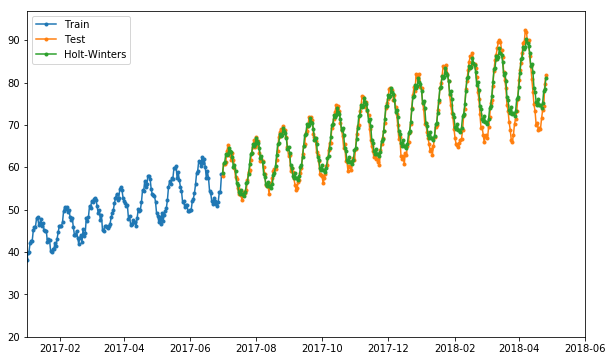

In [142]:
df_xy.index.freq = 'D'
train_size = 700
train, test = df_xy.iloc[:train_size, 0], df_xy.iloc[train_size:, 0]

model = ExponentialSmoothing(train,
                             seasonal='mul',
                             trend='add',
                             seasonal_periods=25).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(train.index, train, marker = '.', label='Train');
plt.plot(test.index, test, marker='.', label='Test')
plt.plot(pred.index, pred, marker='.', label='Holt-Winters')
plt.xlim([datetime.date(2017,1,1), datetime.date(2018,6,1)])
plt.ylim(20,)
plt.legend(loc=2)

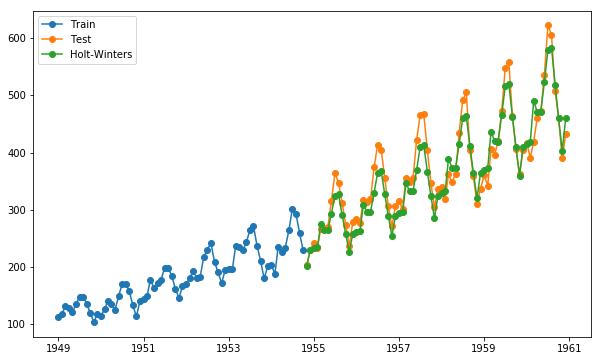

In [83]:
df = pd.read_csv('ap.csv', 
                 parse_dates=['Month'], 
                 index_col='Month'
)
df.index.freq = 'MS'
# train, test = df.iloc[:130, 0], df.iloc[130:, 0]
train, test = df.iloc[:70, 0], df.iloc[70:, 0]
model = ExponentialSmoothing(train, 
                             seasonal='mul',
                             trend='mul',
                             seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(train.index, train, marker = 'o', label='Train');
plt.plot(test.index, test, marker='o', label='Test')
plt.plot(pred.index, pred, marker='o', label='Holt-Winters')

plt.legend(loc='best')

In [18]:
df.head(12)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [3]:
statsmodels.__version__

'0.9.0'

In [1]:
!which python


/Users/mdymshits/virtualenv/ir-threat/bin/python


In [88]:

pd.date_range('1/1/18', '3/1/18', freq='W')

DatetimeIndex(['2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28',
               '2018-02-04', '2018-02-11', '2018-02-18', '2018-02-25'],
              dtype='datetime64[ns]', freq='W-SUN')

In [93]:
len(x)

1000

In [102]:
pd.date_range(start='1/1/15', end='11/3/18', periods=1000)[:30]

DatetimeIndex([          '2015-01-01 00:00:00',
               '2015-01-02 09:40:54.054054144',
               '2015-01-03 19:21:48.108108032',
               '2015-01-05 05:02:42.162162176',
               '2015-01-06 14:43:36.216216320',
               '2015-01-08 00:24:30.270270208',
               '2015-01-09 10:05:24.324324352',
               '2015-01-10 19:46:18.378378496',
               '2015-01-12 05:27:12.432432384',
               '2015-01-13 15:08:06.486486528',
               '2015-01-15 00:49:00.540540416',
               '2015-01-16 10:29:54.594594560',
               '2015-01-17 20:10:48.648648704',
               '2015-01-19 05:51:42.702702592',
               '2015-01-20 15:32:36.756756736',
               '2015-01-22 01:13:30.810810880',
               '2015-01-23 10:54:24.864864768',
               '2015-01-24 20:35:18.918918912',
               '2015-01-26 06:16:12.972973056',
               '2015-01-27 15:57:07.027026944',
               '2015-01-29 01:38:01.0810

In [105]:
pd.date_range(start='8/1/15', periods=1000, freq='D')[:30]

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30'],
              dtype='datetime64[ns]', freq='D')

In [100]:
365 * .03

10.95

/Users/mdymshits/virtualenv/ir-threat/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


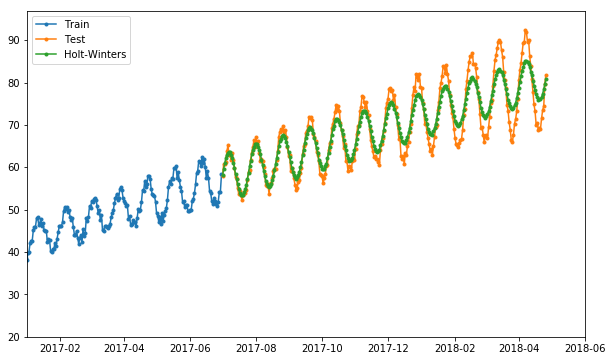

In [160]:
from statsmodels.api import tsa

df_xy.index.freq = 'D'
train_size = 700
train, test = df_xy.iloc[:train_size, 0], df_xy.iloc[train_size:, 0]


model = tsa.statespace.SARIMAX(train, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
pred = model.predict(start=test.index[0], end=test.index[-1], dynamic=True)
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(train.index, train, marker = '.', label='Train');
plt.plot(test.index, test, marker='.', label='Test')
plt.plot(pred.index, pred, marker='.', label='Holt-Winters')
plt.xlim([datetime.date(2017,1,1), datetime.date(2018,6,1)])
plt.ylim(20,)
plt.legend(loc=2)

## Compariosn of 1 level step

In [168]:
type(pred.tolist()
    )

list

In [244]:
%%time
df_xy.index.freq = 'D'
train_size = 300

preds = []
tests = []
for n in range(700-1):
    
    train, test = df_xy.iloc[n :train_size + n, 0], df_xy.iloc[train_size + n: train_size + n + 2, 0]
    model = ExponentialSmoothing(train,
                                 seasonal='mul',
                                 trend='add',
                                 seasonal_periods=25).fit()
    if n % 50 == 0:
        print n, train_size + n, train_size + n, train_size + n + 2

    pred = model.predict(start=test.index[0], end=test.index[-1])

    preds.append(pred.tolist()[0])
    tests.append(test.tolist()[0])
print smape(np.array(preds), np.array(tests))

0 300 300 302
20 320 320 322
40 340 340 342
60 360 360 362
80 380 380 382
100 400 400 402
120 420 420 422
140 440 440 442
160 460 460 462
180 480 480 482
200 500 500 502
220 520 520 522
240 540 540 542
260 560 560 562
280 580 580 582
300 600 600 602
320 620 620 622
340 640 640 642
360 660 660 662
380 680 680 682
400 700 700 702
420 720 720 722
440 740 740 742
460 760 760 762
480 780 780 782
500 800 800 802
520 820 820 822
540 840 840 842
560 860 860 862
580 880 880 882
600 900 900 902
620 920 920 922
640 940 940 942
660 960 960 962
680 980 980 982
0.0178483672071465
CPU times: user 25min 15s, sys: 6.06 s, total: 25min 21s
Wall time: 25min 21s


In [249]:
df_xy.index[300:-1].shape

(699,)

(25, 70)

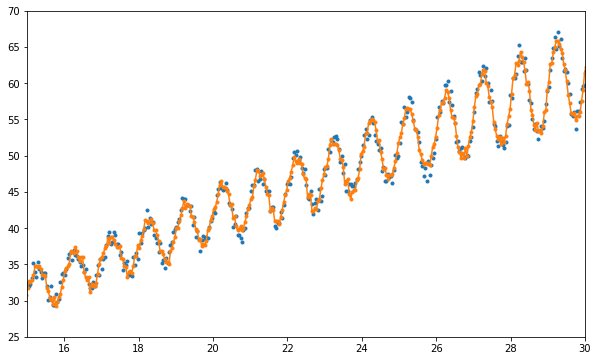

In [278]:
plt.plot(x[300:-1], tests, '.')
plt.plot(x[300:-1], preds, marker='.')

plt.xlim(15, 30)
plt.ylim(25, 70)

In [ ]:
a

In [226]:
a.extend(test.tolist()[0])

TypeError: 'float' object is not iterable

In [208]:
np.array(preds).shape

(6,)

0.1256252555015112

In [191]:
range(3)[2]

2

8.79751638647 10.9774058542
9.46150761115 9.48924241088
10.8589793947 10.9085186431
11.7438607451 9.6723801233
12.5422384255 9.95977115248
11.9228390491 11.1664523838
12.3809525393 11.5798202873
11.5563975175 10.6241148958
13.2838658965 11.4899932663
12.6645559123 12.2885132892
13.176774417 9.71613469409
12.5675227565 10.4499825134
11.6546862344 11.4329032617
11.3105255771 10.5863541884
9.63922620674 8.84959144842
11.7827007295 8.74939608432
9.51395306281 8.28477526893
10.1235082262 10.7887543155
7.91072340444 9.26897929619
9.19643036928 10.7711463173
